## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

df_mouse_study = pd.merge(mouse_metadata, study_results,on='Mouse ID')
df_mouse_study

# Drop all the duplicates
df_mouse_study.drop_duplicates(subset=None, keep='first', inplace=True)
df_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
ser_mouseIDCount = df_mouse_study.groupby("Drug Regimen")["Mouse ID"].count()
ser_mouseCountbyGender = df_mouse_study.groupby("Drug Regimen")["Sex"].count()
ser_tumorVolbyDrugMean = df_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
#ser_tumorVolbyDrugMean = round(ser_tumorVolbyDrug/ser_mouseIDCount,2)
ser_tumorVolbyDrugMedian = df_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
ser_tumorVolbyDrugVariance = df_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
ser_tumorVolbyDrugStd = df_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
ser_tumorVolbyDrugSem = df_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
df_drug_regimen_summary = pd.DataFrame({"Mean":ser_tumorVolbyDrugMean,
                                        "Median":ser_tumorVolbyDrugMedian,
                                        "Variance":ser_tumorVolbyDrugVariance , 
                                        "Standard Deviation":ser_tumorVolbyDrugStd,
                                        "SEM":ser_tumorVolbyDrugSem
                                       })
#pd.concat((ser_tumorVolbyDrugMean,ser_tumorVolbyDrugMedian,ser_tumorVolbyDrugVariance,
                                     #ser_tumorVolbyDrugStd,ser_tumorVolbyDrugSem), axis=1)
#df_drug_regimen_summary= df_drug_regimen_summary[["Mean","Median","variance", "Standard Deviation","SEM"]]
df_drug_regimen_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

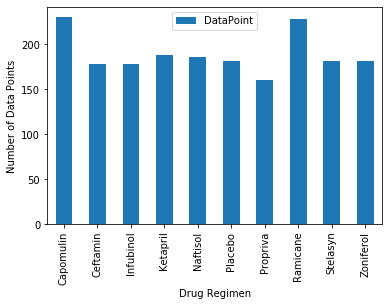

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
df_drug_regimen_barplt = pd.DataFrame({"DataPoint":ser_mouseIDCount                                        
                                       })
df_drug_regimen_barplt.head(10)

df_drug_regimen_barplt.plot(kind='bar',y='DataPoint')
plt.ylabel('Number of Data Points')
#plt.title("Datapoints by Drug Regimen")
plt.show()

#df_drug_regimen_barplt.show()


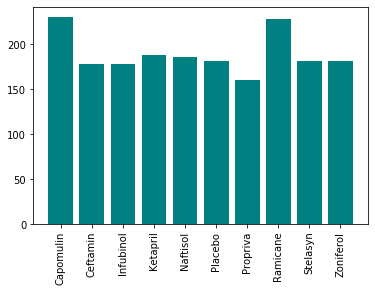

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(df_drug_regimen_barplt))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(6,4))
plt.bar(x_axis, df_drug_regimen_barplt["DataPoint"], color='teal', align="center")
plt.xticks(tick_locations, df_drug_regimen_barplt.index, rotation="vertical")
plt.show()


## Pie plots

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ser_mouseIDCountbyGender = df_mouse_study.groupby("Sex")["Mouse ID"].count()
#ser_mouseIDCountbyGender
df_gender_dist = pd.DataFrame({"GenderCount":ser_mouseIDCountbyGender                                        
                                       })
df_gender_dist.head()

,GenderCount
Sex,
Female,934
Male,958


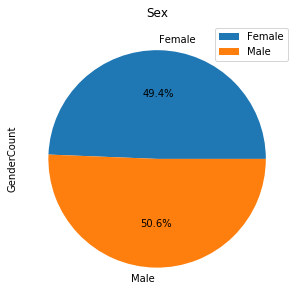

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plot = df_gender_dist.plot.pie(y='GenderCount', figsize=(5, 5),autopct='%1.1f%%',title="Sex")

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen